# 套件版本

In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
from keras.utils import np_utils
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
fr.__version__

'1.3.2'

In [3]:
fr.version()

platform          : win32
conda             : 4.5.5
jupyter notebook  : 5.0.0
Python            : 3.6.3 
numpy             : 1.13.3
pandas            : 0.20.3
matplotlib        : 2.2.2
sklearn           : 0.19.1
tensorflow        : 1.2.1
keras             : 2.1.3
cv2               : 3.4.0
dlib              : 19.6.1
facerecognition   : 1.3.2


# 人臉數據庫收集

In [8]:
fr.photograph_face(sample_name='sample1_face', film=0, save_size=640)

In [10]:
fr.photograph_face(sample_name='sample3_face', film=0, save_size=640)

In [14]:
fr.photograph_face(sample_name='sample7_face', film=0, save_size=640)

In [9]:
fr.extract_face(sample='sample1_face', number=10000, film=0, view_number=1000)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [12]:
fr.extract_face(sample='sample3_face', number=10000, film=0, view_number=1000)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


In [15]:
fr.extract_face(sample='sample7_face', number=10000, film=0, view_number=1000)

已擷取1000張人臉圖片
已擷取2000張人臉圖片
已擷取3000張人臉圖片
已擷取4000張人臉圖片
已擷取5000張人臉圖片
已擷取6000張人臉圖片
已擷取7000張人臉圖片
已擷取8000張人臉圖片
已擷取9000張人臉圖片
已擷取10000張人臉圖片
已擷取10000張人臉樣本


# 資料預處理

In [16]:
# 寫入sample_name.txt

In [4]:
name_dict, number_of_samples=fr.get_name_dict()

In [5]:
name_dict

{'sample0': 'Rex', 'sample1': 'Wang Guan-gjing', 'sample2': 'Chen Siy-uan'}

### 分割數據

In [6]:
fr.train_validation_test_split(tt_split_ratio=0.1, tv_split_ratio=0.1)

--------------------------------------------------------------------------------
|                                                              |               |
|              sample_train_validation                         |  sample_test  |
|                                                              |               |
--------------------------------------------------------------------------------
sample0_train_validation: 9000 					sample0_test: 1000
sample1_train_validation: 8984 					sample1_test: 999
sample2_train_validation: 8993 					sample2_test: 1000

--------------------------------------------------------------------------------
|                                      |                       |               |
|              sample_train            |  sample_validation    |  sample_test  |
|                                      |                       |               |
--------------------------------------------------------------------------------
sample0_train: 8100 			sa

In [7]:
# 檢查圖片

### 資料增強

In [15]:
fr.data_augmentation(numbers=2)

sample0_face共增加了128筆資料
sample1_face共增加了128筆資料
sample2_face共增加了128筆資料


In [16]:
# 複製到sample0_face後刪除sample0_face+

### 資料標準化

In [8]:
target_size = 224

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 24278 images belonging to 3 classes.
Found 2699 images belonging to 3 classes.
Found 2999 images belonging to 3 classes.


# 建立模型

### 一般CNN

In [28]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

input_shape = (target_size, target_size, 3)

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
# model.add(BatchNormalization())
model.add(Flatten()) # Flattening
# model.add(BatchNormalization())

# model.add(Dense(128))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(128))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(number_of_samples))
# # model.add(BatchNormalization())
# model.add(Activation('softmax'))

model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               11944064  
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
__________

### vgg16(自己寫)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D

# input_shape = (80, 80, 3)

# model = Sequential([
#                     Conv2D(64, (3, 3), input_shape=input_shape, padding='same',activation='relu'),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(128, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(256, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(512, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Conv2D(512, (3, 3), activation='relu', padding='same',),
#                     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#                     Flatten(),
#                     Dense(512, activation='relu'),
#                     Dense(512, activation='relu'),
#                     Dense(10, activation='softmax')
#                     ])

# model.summary()   

### vgg16(keras.applications)

In [ ]:
# from keras.applications import VGG16
 
# vgg_conv = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(224, 224, 3))


### vgg16遷移學習

In [5]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
model = Sequential()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [10]:
for layer in vgg16_model.layers:
    model.add(layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
model.layers.pop()

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
model.add(Dense(number_of_samples, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy'])

# 載入模型

In [11]:
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [12]:
# https://keras.io/zh/models/sequential/
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [29]:
history = model.fit_generator(
                              training_set, 
                              steps_per_epoch=10,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_set,
                              validation_steps=10,
                              shuffle=True
                             )

Epoch 1/20
10/10 [==============================] - 8s 786ms/step - loss: 5.5806 - acc: 0.4400 - val_loss: 3.3045 - val_acc: 0.3300
Epoch 2/20
10/10 [==============================] - 7s 700ms/step - loss: 1.3775 - acc: 0.2900 - val_loss: 1.0358 - val_acc: 0.4000
Epoch 3/20
10/10 [==============================] - 7s 706ms/step - loss: 0.9217 - acc: 0.4800 - val_loss: 0.7167 - val_acc: 0.7300
Epoch 4/20
10/10 [==============================] - 7s 657ms/step - loss: 0.5601 - acc: 0.8700 - val_loss: 0.3355 - val_acc: 0.9400
Epoch 5/20
10/10 [==============================] - 7s 709ms/step - loss: 0.4560 - acc: 0.8300 - val_loss: 0.4353 - val_acc: 0.8600
Epoch 6/20
10/10 [==============================] - 7s 677ms/step - loss: 0.2646 - acc: 0.8900 - val_loss: 0.2605 - val_acc: 0.9000
Epoch 7/20
10/10 [==============================] - 7s 668ms/step - loss: 0.1722 - acc: 0.9500 - val_loss: 0.1518 - val_acc: 0.9400
Epoch 8/20
10/10 [==============================] - 7s 672ms/step - loss: 0.

In [24]:
# history = model.fit_generator(
#                               training_set,
#                               steps_per_epoch = 3,
#                               nb_epoch=5,
#                               verbose = 1,
#                               validation_data = validation_set,
#                               nb_val_samples=3,
#                               shuffle=True,
#                               )

# 驗證曲線

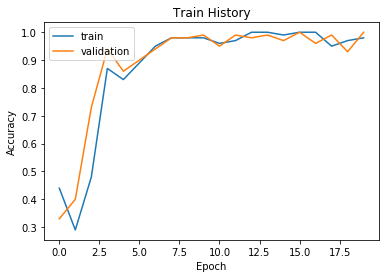

In [30]:
fr.show_acc_history(history=history)

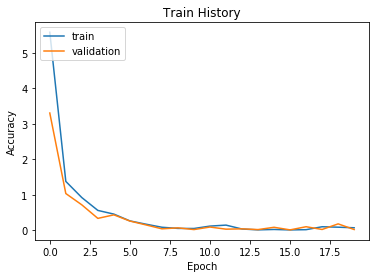

In [31]:
fr.show_loss_history(history=history)

# 評估模型

In [16]:
fr.evaluation_model(model=model, target_size=224)

Found 2999 images belonging to 3 classes.


0.95898632877625878

# 混淆矩陣

In [17]:
fr.crosstab(model=model, target_size=224)

Found 2999 images belonging to 3 classes.


predict,Chen Siy-uan,Rex,Wang Guan-gjing
label,,,
Chen Siy-uan,998,0,2
Rex,4,880,116
Wang Guan-gjing,1,0,998


# 儲存模型

In [18]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/facerecognition.hd5')
print("Saved model to disk")

Saved model to disk


# 模型預測

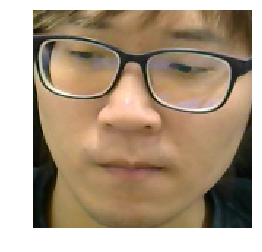

Rex            的機率為: 0.9989773035049438
Wang Guan-gjing的機率為: 0.0007167744915932417
Chen Siy-uan   的機率為: 0.0003059252630919218

預測結果為: Rex(0.9989773035049438%)


In [32]:
fr.predict(model=model, img=r'temporarily.jpg', target_size=224)

# 基於深度學習的人臉辨識

In [35]:
fr.face_recognition_everyone(model=model, threshold=0.5, film=0, target_size=224)

In [34]:
fr.face_recognition(model=model, threshold=0.5, film=0, target_size=224)

In [57]:
fr.face_recognition_system(model=model, threshold=0.5, film=0, target_size=224, catch_times=10)

# 基於直方圖的人臉辨識

In [37]:
fr.histogram_face_recognition(threshold=100, film=0, txt='sample_name.txt')

In [37]:
fr.histogram_face_recognition_system(threshold=100, film=0, txt='sample_name.txt', catch_times=40)